In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Telco-Customer-Churn.csv')

In [3]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [4]:
for i in df.columns:
    print(df[i].unique())

['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
['Female' 'Male']
[0 1]
['Yes' 'No']
['No' 'Yes']
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
['No' 'Yes']
['No phone service' 'No' 'Yes']
['DSL' 'Fiber optic' 'No']
['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['Month-to-month' 'One year' 'Two year']
['Yes' 'No']
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
['No' 'Yes']


In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
for i in df.columns:
    if df[i].dtype ==  object:
        lable = LabelEncoder()
        df[i] = lable.fit_transform(df[i])

In [7]:
df.corr()['Churn']

customerID         -0.017858
gender             -0.008545
SeniorCitizen       0.150541
Partner            -0.149982
Dependents         -0.163128
tenure             -0.354049
PhoneService        0.011691
MultipleLines       0.038043
InternetService    -0.047097
OnlineSecurity     -0.289050
OnlineBackup       -0.195290
DeviceProtection   -0.177883
TechSupport        -0.282232
StreamingTV        -0.036303
StreamingMovies    -0.038802
Contract           -0.396150
PaperlessBilling    0.191454
PaymentMethod       0.107852
MonthlyCharges      0.192858
TotalCharges       -0.199484
Churn               1.000000
Name: Churn, dtype: float64

In [8]:
df = df.drop(['customerID', 'gender', 'PhoneService', 'MultipleLines', 'InternetService', 'StreamingTV', 'StreamingMovies'], axis=1)

In [9]:
df

,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,1,0,2,0,0,0,1,2,29.85,29.85,0
1,0,0,0,34,2,0,2,0,1,0,3,56.95,1889.50,0
2,0,0,0,2,2,2,0,0,0,1,3,53.85,108.15,1
3,0,0,0,45,2,0,2,2,1,0,0,42.30,1840.75,0
4,0,0,0,2,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,1,1,24,2,0,2,2,1,1,3,84.80,1990.50,0
7028,0,1,1,72,0,2,2,0,1,1,1,103.20,7362.90,0
7029,0,1,1,11,2,0,0,0,0,1,2,29.60,346.45,0
7030,1,1,0,4,0,0,0,0,0,1,3,74.40,306.60,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     7032 non-null   int64  
 1   Partner           7032 non-null   int32  
 2   Dependents        7032 non-null   int32  
 3   tenure            7032 non-null   int64  
 4   OnlineSecurity    7032 non-null   int32  
 5   OnlineBackup      7032 non-null   int32  
 6   DeviceProtection  7032 non-null   int32  
 7   TechSupport       7032 non-null   int32  
 8   Contract          7032 non-null   int32  
 9   PaperlessBilling  7032 non-null   int32  
 10  PaymentMethod     7032 non-null   int32  
 11  MonthlyCharges    7032 non-null   float64
 12  TotalCharges      7032 non-null   float64
 13  Churn             7032 non-null   int32  
dtypes: float64(2), int32(10), int64(2)
memory usage: 494.6 KB


In [12]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
skaler = StandardScaler()

In [22]:
X_train = skaler.fit_transform(X_train)

In [25]:
X_test= skaler.fit_transform(X_test)

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [29]:
model = RandomForestClassifier()

In [30]:
params = {
    'n_estimators': [100, 150],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'min_weight_fraction_leaf': [0.0, 0.1],
    'max_leaf_nodes': [None, 10],
}

In [31]:
full_model = GridSearchCV(model, params , cv=3, verbose=2)

In [32]:
full_model.fit(X_train, y_train)

Fitting 3 folds for each of 128 candidates, totalling 384 fits
[CV] END criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=100; total time=   0.6s
[CV] END criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=100; total time=   0.5s
[CV] END criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=100; total time=   0.5s
[CV] END criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=150; total time=   0.7s
[CV] END criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=150; total time=   0.7s
[CV] END criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_s

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10], 'max_leaf_nodes': [None, 10],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'min_weight_fraction_leaf': [0.0, 0.1],
                         'n_estimators': [100, 150]},
             verbose=2)

In [33]:
y_pred = full_model.predict(X_test)

In [34]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay , accuracy_score

In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1549
           1       0.64      0.48      0.55       561

    accuracy                           0.79      2110
   macro avg       0.74      0.69      0.71      2110
weighted avg       0.78      0.79      0.78      2110



In [36]:
accuracy_score(y_test, y_pred)

0.7909952606635071

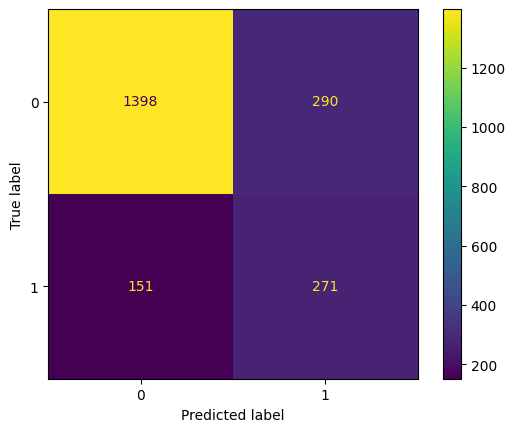

In [37]:
ConfusionMatrixDisplay(confusion_matrix(y_pred, y_test)).plot()

In [38]:
df['Churn'].value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64